In [1]:
import pyforest
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv('AirPassenger.csv')
df.head()

<IPython.core.display.Javascript object>

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year-Month  144 non-null    object
 1   Pax         144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])

<IPython.core.display.Javascript object>

C:\Users\hp\AppData\Local\Temp\ipykernel_318912\2546741847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])


In [7]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [8]:
df=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'],index_col='Year-Month')

<IPython.core.display.Javascript object>

C:\Users\hp\AppData\Local\Temp\ipykernel_318912\3049518246.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'],index_col='Year-Month')


In [9]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
df['1949-03':'1952-01']

,Pax
Year-Month,
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104


In [15]:
df.loc['1951-06-01']

Pax    178
Name: 1951-06-01 00:00:00, dtype: int64

<IPython.core.display.Javascript object>

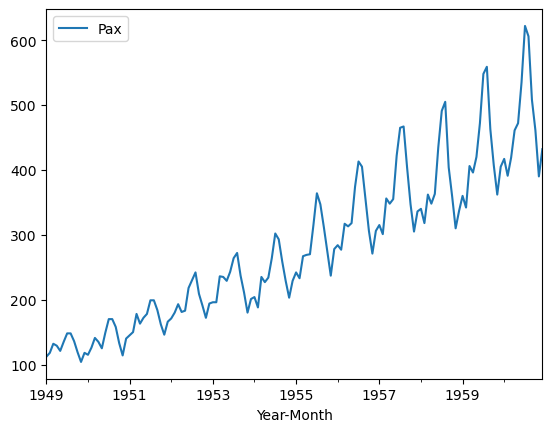

In [16]:
df.plot()
plt.show()

<IPython.core.display.Javascript object>

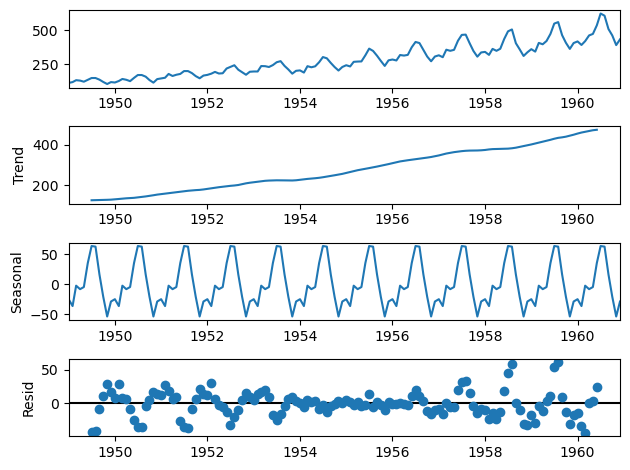

In [17]:
df_seasonal_decompose=seasonal_decompose(df,model='additive',period=12)
df_seasonal_decompose.plot()
plt.show()

In [22]:
df_seasonal_decompose.resid.isna().sum()

12

In [24]:
df_log=df.copy()
df_log['Pax']=np.log(df)

<IPython.core.display.Javascript object>

<Axes: xlabel='Year-Month'>

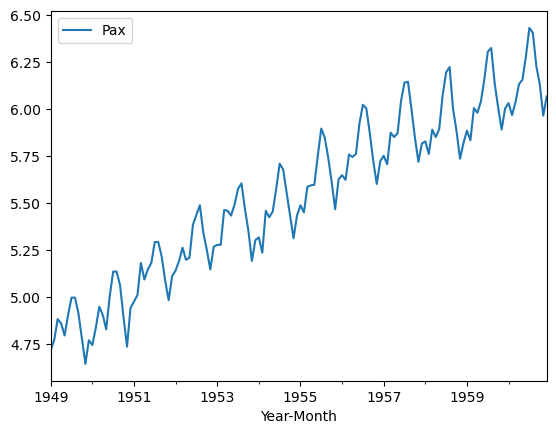

In [26]:
df_log.plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

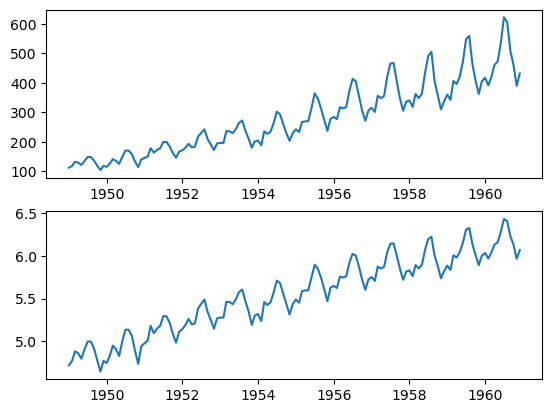

In [27]:
plt.subplot(2,1,1)
plt.plot(df)

plt.subplot(2,1,2)
plt.plot(df_log)

## Example 2 with daily total female birth 

In [30]:
df=pd.read_csv('daily-total-female-births.csv',parse_dates=['Date'],index_col='Date')
df.head()

<IPython.core.display.Javascript object>

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<Axes: xlabel='Date'>

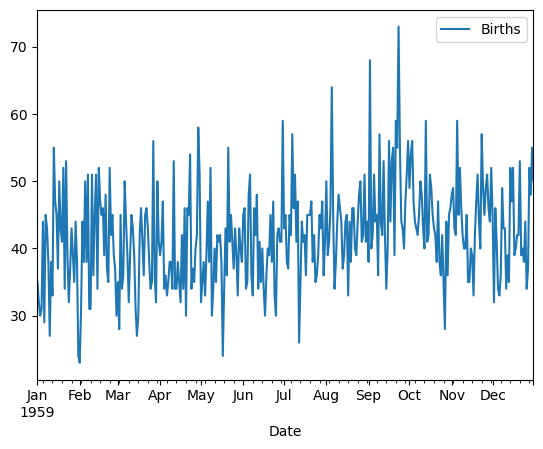

In [31]:
df.plot()

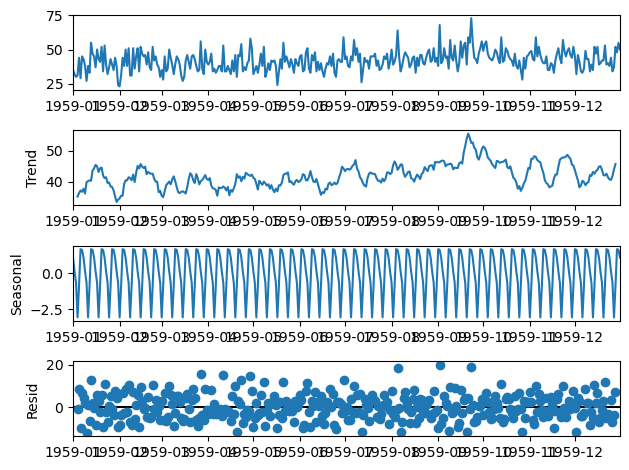

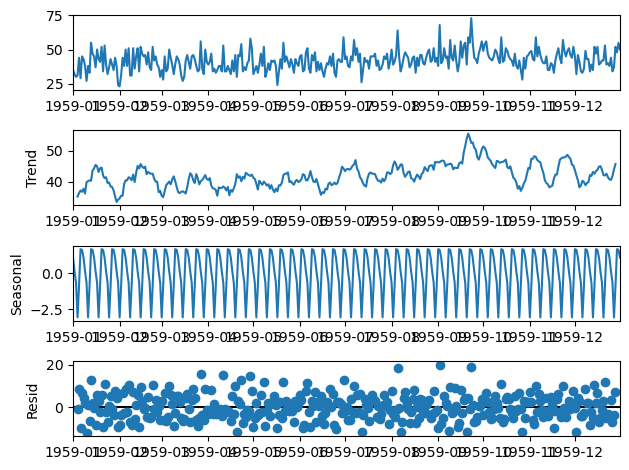

In [32]:
df_decom=seasonal_decompose(df,model='additive')
df_decom.plot()

In [33]:
df_decom.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [34]:
df_decom.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [35]:
df_q=df.resample('Q').mean()

<Axes: xlabel='Date'>

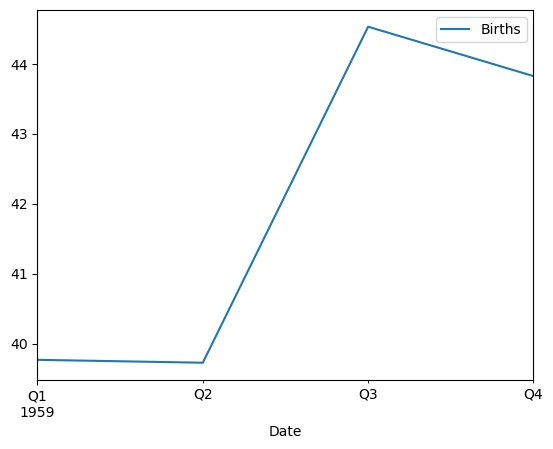

In [36]:
df_q.plot()